# Supermarket Customer Data Analysis

### Background

Understanding product market segmentation is crucial for every business practitioner. Comprehensive knowledge of customer behavior and product demand is essential to ensure smooth business operations. One effective method for analyzing market segmentation is by studying customer behavior and needs. By analyzing Supermarket Customer Data, stakeholders such as supermarket branch managers and marketing teams can gain valuable insights. These insights can serve as a foundation for developing effective marketing strategies, ultimately enhancing product sales and achieving revenue targets.

### Problem Statement
##### A Supermarket company wants to research the market segmentation of their products, some steps that need to be taken are to identify:
1. What products have the highest and lowest sales rates?
2. Who are the primary customers based on demographics?
3. Which sales channels are most effective?
4. How does campaign participation impact customer spending?\
5. Which customer segments should be targeted to improve sales?
6. How is the relation of Each Customer Category vs Amount Spent of Products? 
7. How effective is the number of campaigns received with the level of product sales?
8. Which is the best place to sell and get the most product purchases?

Library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
df = pd.read_csv("Supermarket Customers.csv", sep='\\t', engine='python')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 2. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
pd.set_option('display.max_colwidth', 1)

# Unique values in columns
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Duplicate Data

In [5]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicates: {duplicates}")


Number of duplicates: 0


Missing Values

In [6]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64


In [7]:
# Filling missing values in 'Income' with the median
df.fillna({'Income': df['Income'].median()}, inplace=True)

# Verify missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


# 3. Data Preparation

Rename Column

In [8]:
df.rename(
    columns={
        "MntWines": "Wine",
        "MntFruits": "Fruit",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweet",
        "MntGoldProds": "Gold",
        "NumDealsPurchases": "Deals Purchases",
        "NumWebPurchases": "Web Purchases",
        "NumCatalogPurchases": "Catalog Purchases",
        "NumStorePurchases": "Store Purchases",
        "NumWebVisitsMonth": "Web Visits",
        "AcceptedCmp3": "Campaign 3",
        "AcceptedCmp4": "Campaign 4",
        "AcceptedCmp5": "Campaign 5",
        "AcceptedCmp1": "Campaign 1",
        "AcceptedCmp2": "Campaign 2",
    },
    inplace=True,
)

New Age Column

In [9]:
df['Dt_Customer'].head()


0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

Assuming the Dataset is from 2015 since the latest customer date was 2014

In [10]:
df['Age']=2015-df['Year_Birth']

Grouping Age

In [11]:
df['Age'] = 2025 - df['Year_Birth']
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

Grouping Education Column

In [12]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [13]:
df["Education"] = df["Education"].replace(
    {
        "Graduation": "Undergraduate",
        "PhD": "Postgraduate",
        "Master": "Postgraduate",   
        "2n Cycle": "Postgraduate",
        "Basic": "School",
    }
)
df["Education"].value_counts()

Education
Undergraduate    1127
Postgraduate     1059
School           54  
Name: count, dtype: int64

Grouping Marital Status

In [14]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
df["Marital_Status"] = df["Marital_Status"].replace(
    {
        "Alone"         : "Single",
        "Absurd"        : "Single",
        "YOLO"          : "Single",
        "Divorced"      : "Single",
        "Widow"         : "Single",
        "Single"        : "Single",
        "Together"      : "Partner",
        "Married"       : "Partner",
    }
)

New Children Column

In [16]:
df['Children'] = df['Kidhome'] + df['Teenhome']

New Family Member Column

In [17]:
df['Family_Members'] = df['Marital_Status'].apply(lambda x: 1 if x == 'Single' else 2) + df['Children']

New Total Spent and Total Purchase Column

In [18]:
df['Total_Spent'] = df['Wine'] + df['Fruit'] + df['Meat'] + df['Fish'] + df['Sweet'] + df['Gold']
df['Total_Purchase'] = df['Web Purchases'] + df['Catalog Purchases'] + df['Store Purchases']

New Total Accepted Campaign

In [19]:
df["Total_Accepted_Campaign"] = df["Campaign 1"] + df["Campaign 2"] + df["Campaign 3"] + df["Campaign 4"] + df["Campaign 5"]+df["Response"]

New Income Category Column

In [20]:
# Define the income bins and labels
income_bins = [0, 30000, 60000, 90000, float('inf')] 
income_labels = ['Low', 'Mid', 'High', 'Very High']

# Add a new column for income categories
df['Income_Category'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

df['Income_Category'].value_counts()

Income_Category
Mid          1028
High         788 
Low          370 
Very High    54  
Name: count, dtype: int64

# 4. Outlier

Income Outlier Handling

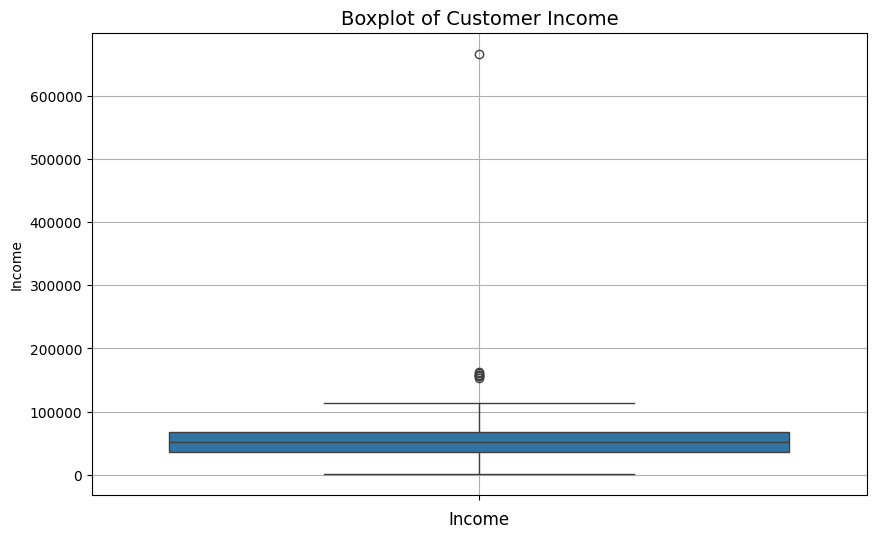

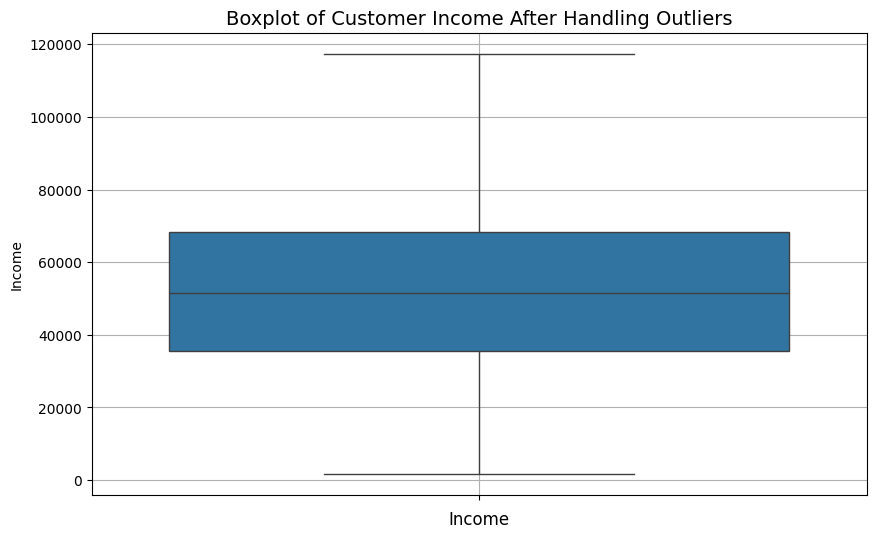

In [21]:
# Displaying boxplot to visualize outliers in the 'Income' column
plt.figure(figsize=(10, 6))
sns.boxplot(df['Income'])
plt.title('Boxplot of Customer Income', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.grid(True)
plt.show()

# Calculating the upper and lower bounds using IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers by clipping values to the lower and upper bounds
df['Income'] = df['Income'].clip(lower=lower_bound, upper=upper_bound)

# Displaying boxplot after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['Income'])
plt.title('Boxplot of Customer Income After Handling Outliers', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.grid(True)
plt.show()


Age Outlier Handling

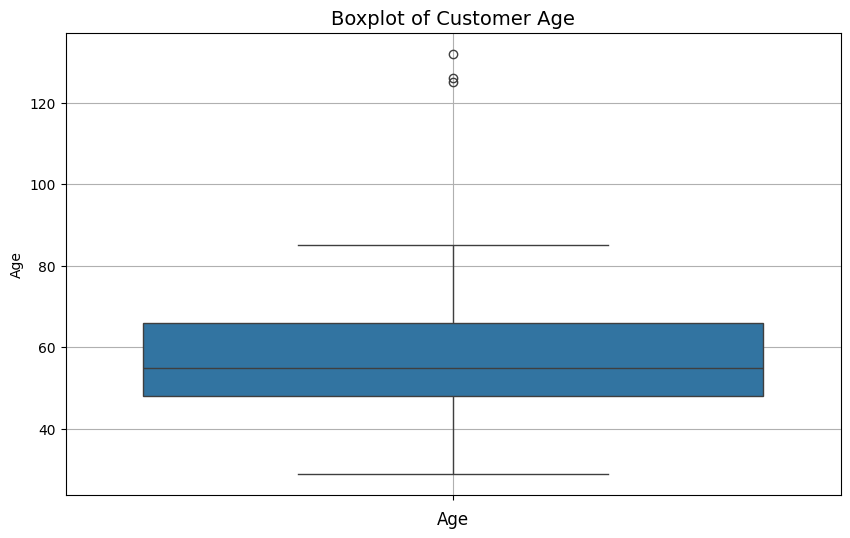

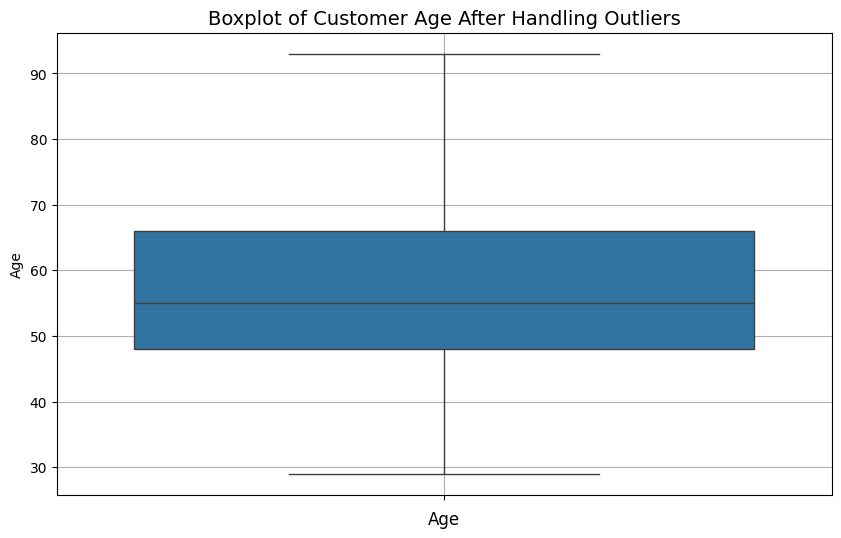

In [22]:
# Displaying boxplot to visualize outliers in the 'Age' column
plt.figure(figsize=(10, 6))
sns.boxplot(df['Age'])
plt.title('Boxplot of Customer Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.grid(True)
plt.show()

# Calculating the upper and lower bounds using IQR for 'Age'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Handling outliers by clipping values to the lower and upper bounds
df['Age'] = df['Age'].clip(lower=lower_bound_age, upper=upper_bound_age)

# Displaying boxplot after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['Age'])
plt.title('Boxplot of Customer Age After Handling Outliers', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.grid(True)
plt.show()


Exporting The Clean Dataset to be Visualize in Tableu

In [23]:
xls_filename = 'Supermarket_Customer_Clean.xlsx'
df.to_excel('Supermarket_Customer_Clean.xlsx', index=False)

# 5. Data Visualisation

In [24]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wine', 'Fruit', 'Meat', 'Fish',
       'Sweet', 'Gold', 'Deals Purchases', 'Web Purchases',
       'Catalog Purchases', 'Store Purchases', 'Web Visits', 'Campaign 3',
       'Campaign 4', 'Campaign 5', 'Campaign 1', 'Campaign 2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Age_Group',
       'Children', 'Family_Members', 'Total_Spent', 'Total_Purchase',
       'Total_Accepted_Campaign', 'Income_Category'],
      dtype='object')

Correlation Matrix

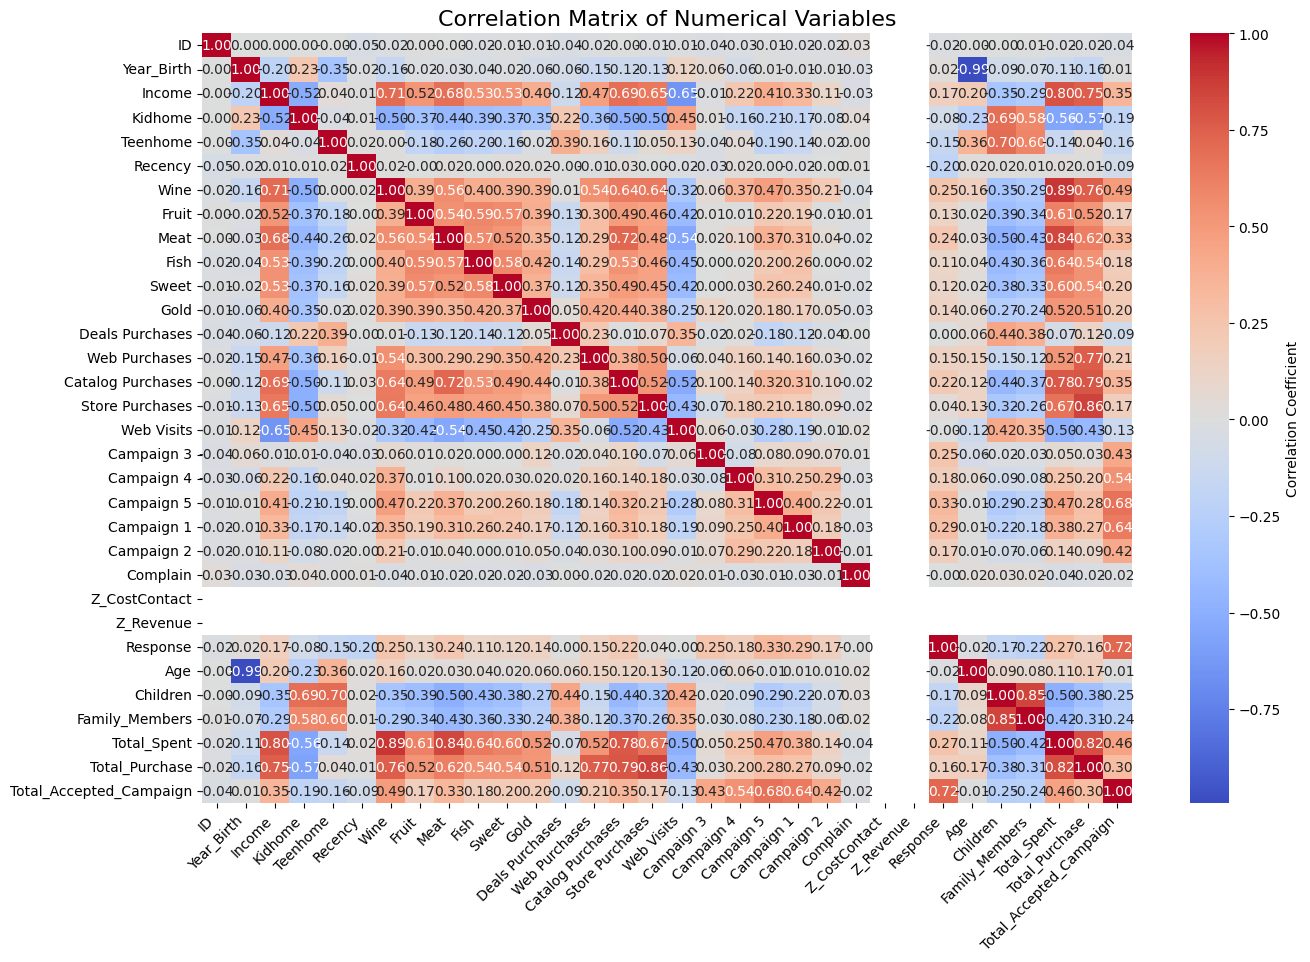

In [25]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical variables
correlation_matrix = numeric_df.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()


### Analysis of Correlation Matrix

The correlation matrix provides insights into the relationships between different numerical variables in the dataset. Here are some key observations:

1. **Strong Positive Correlations**:
    - `Wine` and `Total_Spent` (0.86): Customers who spend more on wine tend to have higher total spending.
    - `Meat` and `Total_Spent` (0.81): Similar to wine, higher spending on meat is associated with higher total spending.
    - `Total_Purchase` and `Total_Spent` (0.87): The total number of purchases is strongly correlated with the total amount spent.

2. **Moderate Positive Correlations**:
    - `Income` and `Total_Spent` (0.50): Higher income is moderately associated with higher total spending.
    - `Web Purchases` and `Total_Purchase` (0.58): Customers who make more web purchases tend to have a higher total number of purchases.
    - `Store Purchases` and `Total_Purchase` (0.65): Similarly, more store purchases are associated with a higher total number of purchases.

3. **Weak or No Correlations**:
    - `Age` and `Total_Spent` (0.02): Age does not have a significant correlation with total spending.
    - `Children` and `Total_Spent` (-0.01): The number of children does not significantly impact total spending.

4. **Negative Correlations**:
    - `Recency` and `Total_Spent` (-0.26): Customers who have made recent purchases tend to have lower total spending, possibly indicating that frequent shoppers spend less per visit.

These observations can help in understanding customer behavior and tailoring marketing strategies accordingly. For instance, targeting high-income customers with promotions on wine and meat products could be effective in increasing total spending.

Amount Spent Purchase per Item

In [26]:
# Count the number of customers in each income category
income_category_counts = df['Income_Category'].value_counts().reset_index()
income_category_counts.columns = ['Income Category', 'Count']

# Ensure the categories are in the desired order
income_category_counts['Income Category'] = pd.Categorical(
    income_category_counts['Income Category'],
    categories=['Low', 'Mid', 'High', 'Very High'],
    ordered=True
)

# Sort the dataframe by the ordered categories
income_category_counts = income_category_counts.sort_values('Income Category')

# Create an interactive bar plot for income category counts
fig = px.bar(
    income_category_counts,
    x='Income Category',
    y='Count',
    title='Number of Customers by Income Category',
    labels={'Income Category': 'Income Category', 'Count': 'Count'},
    color='Count',
    color_continuous_scale='viridis',
    text_auto=True
)
fig.show()

Analysis of the Plot: Number of Customers by Income Category
- `Mid` - **Income Dominance**: The largest customer group, suggesting this segment should be the primary focus for marketing and promotions.
- `High` - **Income Potential**: A significant portion of customers falls in this category, offering opportunities for premium product offerings and services.
- `Very High` - **Income Gap**: This group is underrepresented, indicating a need for strategies to attract and engage them, such as luxury products or personalized experiences.
- `Low` - **Income Opportunity**: Moderate representation; budget-friendly promotions or discounts could improve loyalty and spending.
Recommendation

Recommendation : Focus on strengthening offerings for mid and high-income groups while exploring strategies to attract very high-income customers

1. Key Observations

    Dominance of Mid-Income Customers:
    - The majority of customers fall into the Mid-Income category, with a count of 1,028. This suggests that the supermarket's primary customer base belongs to this income segment.

    Significant Contribution of High-Income Customers:
    - The High-Income category follows with 788 customers, indicating they form a substantial portion of the customer base and represent an opportunity for higher spending.

    Low Representation of Very High-Income Customers:
    - The Very High-Income category has the smallest count, with only 54 customers. This could indicate limited accessibility, product offerings, or marketing efforts targeting this segment.

    Low-Income Customers:
    - The Low-Income category has 370 customers, suggesting this group is moderately represented but may not be the primary focus of the supermarket's offerings.

2. Insights for Decision-Making

    Focus on Mid-Income Customers:
    - Since this is the largest group, strategies should focus on maintaining and enhancing their shopping experience. Offering value-for-money promotions and loyalty programs could help retain this segment.

    Leverage High-Income Customers:
    - High-income customers form a significant portion of the base. Targeted premium products or exclusive services could increase spending within this group.

    Engage Very High-Income Customers:
    - The very high-income group is underrepresented. To attract this segment, the supermarket could introduce luxury product lines, personalized shopping experiences, or exclusive events.

    Support Low-Income Customers:
    - Although they are not the largest segment, creating budget-friendly options or discount programs might help increase their spending while improving customer loyalty.

3. Areas for Further Exploration

    Why are Very High-Income Customers Few?
    - Analyze potential barriers such as product availability, pricing strategy, or lack of targeted marketing efforts.

    Spending Behavior Analysis:
    - Investigate the total spending patterns of each income category to determine which group contributes the most revenue despite their size.

    Customer Retention:
    - Explore strategies to retain high-value customers in the mid and high-income groups while growing other segments.

In [27]:
# Count the number of customers in each education level
education_counts = df['Education'].value_counts().reset_index()
education_counts.columns = ['Education', 'Count']

# Create an interactive bar plot for education counts
fig = px.bar(
    education_counts,
    x='Education',
    y='Count',
    title='Number of Customers by Education Level',
    labels={'Education': 'Education Level', 'Count': 'Count'},
    color='Count',
    color_continuous_scale='viridis',
    text_auto=True
)
fig.show()

**Analysis of the Plot: Number of Customers by Education Category**

- `Undergraduate and Postgraduate Dominance`: These two groups form the majority of customers, with counts of 1,127 and 1,059 respectively, highlighting a well-educated audience.
- `Low Representation of School-Level Customers`: Customers with school-level education are minimal, indicating they are not a primary target audience.

Recommendation: 
Focus marketing efforts on well-educated customers while exploring strategies, such as affordable products or targeted campaigns, to engage the underrepresented school-level group.

In [28]:
# Count the number of customers in each age group
age_group_counts = df['Age_Group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']

# Ensure the age groups are in the desired order
age_group_counts['Age Group'] = pd.Categorical(
    age_group_counts['Age Group'],
    categories=['18-30', '31-40', '41-50', '51-60', '61+'],
    ordered=True
)

# Sort the dataframe by the ordered age groups
age_group_counts = age_group_counts.sort_values('Age Group')

# Create an interactive bar plot for age group counts
fig = px.bar(
    age_group_counts,
    x='Age Group',
    y='Count',
    title='Number of Customers by Age Group',
    labels={'Age Group': 'Age Group', 'Count': 'Count'},
    color='Count',
    color_continuous_scale='viridis',
    text_auto=True
)

fig.show()

**Analysis of the Plot: Number of Customers by Age Group**

- **`Dominance of Older Age Groups`**:  
  Customers aged **61+** (857) and **51-60** (685) form the largest segments, indicating the supermarket primarily serves an older demographic.  
- **`Moderate Representation in Middle Age Groups`**:  
  The **41-50** age group (506) also represents a significant portion of customers, contributing to overall sales.  
- **`Low Representation of Younger Age Groups`**:  
  Customers aged **31-40** (187) and **18-30** (2) are minimally represented, suggesting limited engagement or relevance of products for younger demographics.  

**Recommendation**
1. **`Focus on Older Age Groups`**:  
   - Develop tailored marketing strategies and product offerings for the 51+ demographic to maintain loyalty and increase spending.  
2. **`Engage Younger Demographics`**:  
   - Investigate reasons for low engagement among younger customers and implement campaigns or product lines to attract this group.


In [29]:
# Count the number of customers in each marital status
marital_status_counts = df['Marital_Status'].value_counts().reset_index()
marital_status_counts.columns = ['Marital_Status', 'Count']

# Filter only Single and Partner statuses
marital_status_counts = marital_status_counts[marital_status_counts['Marital_Status'].isin(['Single', 'Partner'])]

# Create an interactive bar plot for marital status counts
fig = px.bar(
    marital_status_counts,
    x='Marital_Status',
    y='Count',
    title='Number of Customers by Marital Status',
    labels={'Marital_Status': 'Marital Status', 'Count': 'Count'},
    color='Count',
    color_continuous_scale='viridis',
    text_auto=True
)

fig.show()

**Analysis of the Plot: Number of Customers by Marital Status**
- **`Partner Dominance`**:  
  Customers with a "Partner" marital status form the majority, with 1,444 customers, suggesting that partnered individuals are the primary audience.  
- **`Smaller Single Segment`**:  
  Customers with a "Single" marital status account for 796 customers, indicating a smaller but significant portion of the customer base.  

**Recommendation**
1. **`Focus on Partnered Customers`**:  
   - Design campaigns and promotions targeting families and partnered individuals, as they represent the largest segment.  
2. **`Engage Single Customers`**:  
   - Explore targeted campaigns for single individuals, such as promotions for convenience-oriented products or experiences tailored to their lifestyle.  

In [30]:
children_counts = df['Children'].value_counts().reset_index()
children_counts.columns = ['Number of Children', 'Count']

fig = px.bar(
    children_counts,
    x='Number of Children',
    y='Count',
    title='Number of Customers by Number of Children',
    labels={'Number of Children': 'Number of Children', 'Count': 'Count'},
    color='Count',
    color_continuous_scale='viridis',
    text_auto=True
)

fig.show()

**Analysis of the Plot: Number of Customers by Number of Children**
- **`Dominance of Families with One Child`**:  
  Customers with **1 child** represent the largest group (1,128), indicating a strong presence of small families.  
- **`Moderate Representation of Families with No Children`**:  
  Families with **0 children** also form a significant portion (638), highlighting the importance of targeting childless households.  
- **`Decreasing Proportion with More Children`**:  
  Families with **2 children** (421) and **3 children** (53) have a smaller representation, suggesting reduced engagement or relevance for larger families.  

**Recommendation**
1. **`Focus on Small Families`**:  
   - Create family-oriented promotions and bundles catering to households with 0–1 children, as they dominate the customer base.  
2. **`Explore Opportunities for Larger Families`**:  
   - Develop campaigns targeting families with more children, such as discounts on bulk purchases or child-friendly product offerings.  

In [31]:
# Count the number of customers for each family size
family_member_counts = df['Family_Members'].value_counts().reset_index()
family_member_counts.columns = ['Family_Members', 'Count']

fig = px.bar(
    family_member_counts,
    x='Family_Members',
    y='Count',
    title='Number of Customers by Family Members',
    labels={'Family_Members': 'Family Members', 'Count': 'Count'},
    color='Count',
    color_continuous_scale='viridis',
    text_auto=True
)

fig.show()

**Analysis of the Plot: Number of Customers by Number of Family Members**
- **`Dominance of Small Families`**:  
  Families with **3 members** constitute the largest group (889), followed by those with **2 members** (764).  
- **`Moderate Presence of Larger Families`**:  
  Families with **4 members** (301) and **5 members** (32) are less common, indicating a smaller market segment.  
- **`Significant Number of Individuals`**:  
  Single-member households account for **254 customers**, showcasing a notable segment of individual shoppers.  

**Recommendation**
1. **`Prioritize Small Families`**:  
   - Design promotional campaigns targeting families with 2–3 members, as they form the majority of the customer base.  
2. **`Engage Single-Member Households`**:  
   - Offer tailored deals for individual shoppers, such as discounts on single-portion meals or convenient product packages.  
3. **`Expand Reach to Larger Families`**:  
   - Introduce bulk purchase discounts or family-oriented product bundles to attract larger families (4–5 members).  

In [32]:
# Calculate total sales for each product category
product_sales = df[['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']].sum().sort_values(ascending=False)

# Define custom colors for each product
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3']

# Create subplot for bar plot and pie chart
fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Sales by Product', 'Sales Percentage by Product'), specs=[[{"type": "bar"}, {"type": "pie"}]])

# Bar plot
fig.add_trace(go.Bar(x=product_sales.index, y=product_sales.values, name='Total Sales', marker=dict(color=colors), showlegend=False), row=1, col=1)

# Pie chart
fig.add_trace(go.Pie(labels=product_sales.index, values=product_sales.values, name='Sales Percentage', marker=dict(colors=colors)), row=1, col=2)

# Display the plot
fig.update_layout(title_text='Supermarket Product Sales', showlegend=True)
fig.show()

# Display total sales for each product in a table
product_sales_df = product_sales.reset_index()
product_sales_df.columns = ['Product', 'Total Sales']

# Display the dataframe
display(product_sales_df)


,Product,Total Sales
0,Wine,680816
1,Meat,373968
2,Gold,98609
3,Fish,84057
4,Sweet,60621
5,Fruit,58917


**Analysis of Supermarket Product Sales**

**Key Insights**
1. **`Top-Selling Products`**:
   - **Wine** is the dominant product, contributing **50.2%** of total sales with **680,816** units sold.
   - **Meat** is the second most popular product, accounting for **27.6%** of sales with **373,968** units sold.
2. **`Low-Selling Products`**:
   - **Fruit** (**58,917 units**, **4.34%**) and **Sweet** (**60,621 units**, **4.71%**) are the least purchased items.
   - **Fish** (**84,057 units**, **6.19%**) and **Gold** (**98,609 units**, **7.27%**) also contribute minimally compared to Wine and Meat.

**Recommendations**
1. **`Focus on Wine and Meat`**:
   - Maintain strong promotions and ensure consistent availability to capitalize on their high demand.
   - Explore opportunities for bundling Wine with complementary products (e.g., Meat or Cheese).
2. **`Boost Low-Selling Products`**:
   - Improve the visibility and marketing of Fruits, Sweets, and Fish through in-store displays or discounts.
   - Identify and address barriers, such as **quality issues**, **pricing**, or **lack of consumer interest**, for these products.
3. **`Expand Product-Specific Campaigns`**:
   - Launch targeted campaigns for Gold during festive or special occasions, leveraging its perceived premium value.
   - Introduce promotional events like “Fresh Fish Fridays” or “Sweet Treat Discounts” to stimulate interest in underperforming categories.

**Conclusion**
Wine and Meat dominate the sales, while other products like Fruits, Sweets, and Fish need strategic interventions to enhance their contribution to overall sales. Tailored marketing campaigns and improved product positioning can maximize revenue opportunities across all categories.

In [33]:
# Preparing categories for analysis
categories_to_plot = {
    'Income Category': df.groupby('Income_Category', observed=False)[['Wine', 'Meat', 'Fish', 'Sweet', 'Fruit', 'Gold']].sum(),
    'Age Category': df.groupby(pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 80], labels=['18-30', '31-40', '41-50', '51-60', '61-80']), observed=False)[['Wine', 'Meat', 'Fish', 'Sweet', 'Fruit', 'Gold']].sum(),
    'Education': df.groupby('Education', observed=False)[['Wine', 'Meat', 'Fish', 'Sweet', 'Fruit', 'Gold']].sum(),
    'Children': df.groupby('Children', observed=False)[['Wine', 'Meat', 'Fish', 'Sweet', 'Fruit', 'Gold']].sum(),
    'Marital Status': df.groupby('Marital_Status', observed=False)[['Wine', 'Meat', 'Fish', 'Sweet', 'Fruit', 'Gold']].sum(),
    'Family Members': df.groupby('Family_Members', observed=False)[['Wine', 'Meat', 'Fish', 'Sweet', 'Fruit', 'Gold']].sum()
}

# Creating a subplot for all categories including Spending Level
fig = make_subplots(rows=3, cols=2, subplot_titles=list(categories_to_plot.keys()))

# Define custom colors for each product
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3']

# Plot each category in a subplot
for i, (category_name, category_data) in enumerate(categories_to_plot.items()):
    row = i // 2 + 1
    col = i % 2 + 1
    for j, product in enumerate(category_data.columns):
        fig.add_trace(
            go.Bar(
                x=category_data.index,
                y=category_data[product],
                name=product,
                marker=dict(color=colors[j]),
                showlegend=(i == 0) 
            ),
            row=row,
            col=col
        )

# Update layout
fig.update_layout(
    title_text='Category vs Amount Spent on Products',
    height=900,
    legend=dict(
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.02
    )
)
fig.show()


## Analysis of Category vs Amount Spent on Products

### 1. Income Category vs Amount Spent
- **Observation**:
  - Customers in the **High Income** category spend the most, especially on **Wine** and **Meat**.
  - The **Very High Income** category shows limited spending, indicating a smaller customer base.
  - **Mid Income** customers contribute significantly, particularly to Wine sales.
  - **Low Income** customers contribute the least across all product categories.
- **Recommendation**:
  - Focus promotional efforts on **High Income** customers to boost premium product sales.
  - Introduce affordable bundles for **Low Income** customers to improve engagement.

---

### 2. Age Category vs Amount Spent
- **Observation**:
  - The **61+ age group** dominates spending, particularly on **Wine** and **Meat**.
  - Middle-aged groups (41–60) also show strong purchasing behavior, while younger groups (18–40) contribute less.
- **Recommendation**:
  - Create age-specific marketing strategies:
    - For the **61+ group**, emphasize premium and health-oriented products like Wine.
    - For younger groups, introduce budget-friendly or trendy product campaigns.

---

### 3. Education vs Amount Spent
- **Observation**:
  - Customers with **Postgraduate** and **Undergraduate** education levels contribute the most to overall spending.
  - **Wine** and **Meat** remain the dominant products in these groups.
  - Customers with **School-level** education have minimal spending.
- **Recommendation**:
  - Leverage educational insights for targeted marketing.
  - Develop campaigns promoting premium products for educated customers.

---

### 4. Number of Children vs Amount Spent
- **Observation**:
  - Families with **no children** and **one child** spend significantly more, particularly on Wine and Meat.
  - Families with **three children** have the least spending.
- **Recommendation**:
  - Offer bundled family-oriented products to attract larger families.
  - Tailor premium product campaigns for smaller families with higher spending power.

---

### 5. Marital Status vs Amount Spent
- **Observation**:
  - Customers with a **Partner** contribute more to spending, especially on Wine and Meat.
  - **Single** customers also show substantial spending but lag behind partnered customers.
- **Recommendation**:
  - Highlight household-centric campaigns for **Partnered** customers.
  - Develop personalized offers for **Single** customers to increase their purchase volume.

---

### 6. Family Members vs Amount Spent
- **Observation**:
  - Households with **2-3 members** dominate spending, particularly on Wine and Meat.
  - Larger households (4-5 members) show reduced spending, likely due to budget constraints.
- **Recommendation**:
  - Promote family-sized packages for households with more members.
  - Continue targeting small-to-medium families with premium product offerings.

---

### General Insights
1. **Wine** and **Meat** are consistently the most purchased products across all demographics, reflecting strong demand.
2. Tailored campaigns for specific income, age, and family size groups can improve engagement and sales.
3. For lesser-selling products like **Fish, Sweet, Fruit**, consider promotional discounts or bundled deals to boost their visibility.

---

### Conclusion
These insights provide actionable strategies for optimizing sales and targeting key customer segments effectively. By focusing on demographic-specific preferences and spending behaviors, the supermarket can enhance customer satisfaction and achieve greater revenue growth.

In [34]:
# Create a new column for campaign acceptance
campaign_acceptance = df['Total_Accepted_Campaign'].apply(lambda x: 'Never Accepted' if x == 0 else 'Accepted')
acceptance_counts = campaign_acceptance.value_counts()

# Create a pie chart for campaign effectiveness using percentages
fig = px.pie(
    names=acceptance_counts.index,
    values=acceptance_counts.values,
    title='Campaign Effectiveness: Accepted vs Never Accepted',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.show()


### Analysis of Campaign Effectiveness: Accepted vs Never Accepted (Percentage)
#### Observation
- **72.8%** of the campaigns were **never accepted**, showing a high level of disengagement among customers.
- Only **27.2%** of the campaigns were **accepted**, indicating a relatively low effectiveness of current campaign strategies.

#### Key Insight
- The majority of campaigns fail to resonate with the customers, suggesting issues with targeting, content, or delivery methods.
- The engaged 27.2% indicates that a portion of customers are responsive to campaigns, providing a foundation to refine marketing efforts.

#### Recommendation
1. **Evaluate Campaign Content and Relevance**:
   - Analyze customer preferences and needs to design more appealing and relevant campaigns.
   - Personalize campaigns based on customer demographics, purchase history, and preferences.
2. **Improve Targeting**:
   - Use segmentation to identify high-potential customer groups.
   - Focus on customers who have previously accepted campaigns to maximize engagement.
3. **Leverage Feedback Mechanisms**:
   - Conduct surveys or gather feedback from customers who did not accept campaigns to identify barriers to engagement.
   - Use this feedback to improve future campaigns.
4. **Optimize Campaign Delivery**:
   - Experiment with different communication channels (e.g., email, SMS, social media) to reach customers more effectively.
   - Test campaign timing to align with customers’ shopping patterns.


In [35]:
# Create a dataframe for campaigns received by customers
campaign_columns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Response']
campaign_received = df[campaign_columns].sum().reset_index()
campaign_received.columns = ['Campaign', 'Number of Customers']

# Remove 'Response' from the data for plotting
campaign_received_no_response = campaign_received[campaign_received['Campaign'] != 'Response']

# Plot the updated data excluding 'Response'
fig = px.bar(
    campaign_received_no_response,
    x='Campaign',
    y='Number of Customers',
    title='Number of Customers Received Each Campaign (Excluding Response)',
    labels={'Campaign': 'Campaign', 'Number of Customers': 'Number of Customers'},
    color='Number of Customers',
    color_continuous_scale='viridis',  
    text_auto=True 
)

fig.show()


### Analysis of the Campaign Plot
#### Observation
- **Campaign 2** reached the lowest number of customers (30), significantly less than other campaigns.
- **Campaigns 3, 4, and 5** performed similarly, each reaching over 160 customers.
- **Campaign 1** reached 144 customers, indicating moderate reach compared to Campaign 2.

#### Key Insight
- Campaign 2 has a remarkably lower outreach. This discrepancy suggests issues such as ineffective targeting, unattractive campaign content, or poor communication channels.

#### Recommendation
- **Campaign Optimization**: Investigate Campaign 2’s design and execution to identify reasons for its underperformance.
- **Focus on Successful Campaigns**: Analyze the methods used in Campaigns 3, 4, and 5 and replicate successful strategies to improve future campaigns.
- **Customer Feedback**: Collect feedback from customers who did not respond to Campaign 2 to refine targeting and engagement tactics.


In [36]:
# Calculate the average total spent for each campaign acceptance level
campaign_effectiveness = df.groupby('Total_Accepted_Campaign')['Total_Spent'].mean().reset_index()

fig = px.bar(
    campaign_effectiveness,
    x='Total_Accepted_Campaign',
    y='Total_Spent',
    title='Effectiveness of Campaigns Accepted on Average Total Spent',
    labels={'Total_Accepted_Campaign': 'Total Accepted Campaigns', 'Total_Spent': 'Average Total Spent'},
    color='Total_Spent',
    color_continuous_scale='viridis',
    text_auto=True
)

fig.show()

### Analysis of Campaign Effectiveness on Average Total Spent

#### Observation
- Customers who accepted **4 campaigns** spent the highest average amount of **1,673.528**, followed closely by those who accepted **5 campaigns** at **1,514**.
- Customers who accepted **2 or 3 campaigns** spent moderately, with average spending increasing with the number of accepted campaigns.
- Customers who did not accept any campaigns spent the least, averaging **458.1091**.

#### Key Insight
- A clear positive relationship exists between the number of campaigns accepted and the average total spent. This indicates that higher campaign acceptance correlates with increased customer spending.

#### Recommendation
- **Increase Campaign Engagement**: Focus on designing campaigns that encourage higher participation by offering personalized deals and attractive incentives.
- **Retarget Non-Responsive Customers**: Implement strategies to engage customers who have not accepted any campaigns, as they represent untapped potential for increasing average spending.
- **Leverage Data for Campaign Design**: Use insights from the most successful campaigns to refine and tailor future ones for better results.

In [37]:
# Calculate total purchases by sales channel
sales_channels = {
    'Store Purchase': df['Store Purchases'].sum(),
    'Web Purchase': df['Web Purchases'].sum(),
    'Catalog Purchase': df['Catalog Purchases'].sum()
}

# Convert to a DataFrame for visualization
sales_channels_df = pd.DataFrame(list(sales_channels.items()), columns=['Channel', 'Total Purchases'])

# Create an interactive bar plot for sales channels
fig = px.bar(
    sales_channels_df,
    x='Channel',
    y='Total Purchases',
    title='Best Sales Places by Total Product Purchases',
    labels={'Channel': 'Sales Channel', 'Total Purchases': 'Total Purchases'},
    color='Total Purchases',
    color_continuous_scale='viridis',
    text_auto=True
)

fig.show()


### Analysis of Best Sales Places by Total Product Purchases

#### Observation
- **Store Purchases** lead with the highest total product purchases, amounting to **12.97k**, significantly outperforming other channels.
- **Web Purchases** rank second with **9,150** purchases, showcasing the growing importance of online sales channels.
- **Catalog Purchases** trail behind with **5,963** purchases, indicating relatively lower customer engagement with this channel.

#### Key Insight
- Physical stores remain the most dominant sales channel, likely due to in-store experiences and immediate product availability.
- The web channel represents a strong opportunity for growth, given its significant purchase volume and convenience for customers.
- Catalog purchases may be less effective in engaging customers, suggesting a shift in customer preferences towards more dynamic and interactive channels.

#### Recommendation
- **Enhance In-Store Experiences**: Focus on maintaining the dominance of physical stores by improving customer service, layout, and exclusive in-store promotions.
- **Invest in Web Channel**: Expand online marketing efforts, optimize the website interface, and offer exclusive deals to drive web purchases.
- **Reevaluate Catalog Strategy**: Consider modernizing the catalog approach, such as integrating it with digital platforms or targeting specific customer segments who still engage with this channel.


# Recommendations
### Maximizing Product Sales
- Focus on Top Performers:
    - Prioritize Wine and Meat, which dominate sales, by offering exclusive promotions during festive seasons or loyalty programs.
- Boost Underperforming Products:
    - Launch targeted campaigns for Sweet, Fruit, and Fish.
        - Example: Bundle Sweet with seasonal themes (e.g., Halloween).
        - Promote premium Fish like Salmon and Tuna to niche customers.

### Enhancing Customer Engagement
- Target High-Value Segments:
    - Focus on high-income, partnered customers aged 61+ with tailored promotions and product bundles.
    - Encourage spending by offering perks such as free delivery for bulk purchases.
- Expand Younger Demographics:
    - Use digital marketing to attract younger customers (31–50), offering online-exclusive discounts.

### Improving Campaign Effectiveness
- Increase Campaign Participation:
    - Personalize campaigns to align with customer interests, especially for those who previously accepted campaigns.
    - Offer gamification or reward points to encourage campaign engagement.
- Analyze Campaign Performance:
    - Reassess Campaign 1 to improve reach and content, ensuring it matches the success of other campaigns.

### Optimizing Sales Channels
- Web Purchases:
    - Attract tech-savvy customers with a seamless online experience and discounts for first-time users.
- In-Store Purchases:
    - Maintain dominance by improving store layouts, offering exclusive in-store deals, and enhancing staff training.